## Prepare Data

### Anime Recommendations Database

#### Anime Listing

In [2]:
import pandas as pd
cuAnime = pd.read_csv("E:\\applied data science capstone\\data\\CooperUnion\\archive\\anime.csv")

In [3]:
# remove hentai genre and filter for tv and movie in the type feature
no_hentai_df = cuAnime.loc[cuAnime["genre"] != "Hentai", :]
cu_anime_df = no_hentai_df.loc[~no_hentai_df["type"].isin(["Music", "ONA", "OVA", "Special"]), :]

genre_df = cu_anime_df["genre"].value_counts().to_frame()
genre_df = genre_df.reset_index()
genre_df.describe()

,count
count,2197.000000
mean,2.778334
std,8.551703
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,251.000000


In [4]:
genre_df.head()

,genre,count
0,Comedy,251
1,Kids,135
2,Dementia,124
3,"Comedy, Slice of Life",98
4,"Comedy, Kids",86


In [6]:
import plotly.express as px

Hentai is no longer in the genre

In [7]:
genre_df = genre_df[genre_df["count"] > 2]
fig = px.treemap(genre_df, path=['genre'], values='count', title="Genre Distribution")
fig.show()

Left with the two types that we are interested in

In [8]:
type_df = cu_anime_df["type"].value_counts().to_frame()
type_df = type_df.reset_index()
fig = px.treemap(type_df, path=['type'], values='count', title="Type Distribution")
fig.show()

In [9]:
cu_anime_df.describe(include=object)

,name,genre,type,episodes
count,6159,6104,6134,6159
unique,6159,2197,2,187
top,Kimi no Na wa.,Comedy,TV,1
freq,1,251,3787,2310


All the names are now unique  
As we can see episodes is an object, we need to address that.

In [10]:
cu_anime_df["episodes"].unique()

array(['1', '64', '51', '24', '10', '148', '13', '201', '25', '22', '75',
       '26', '12', '27', '43', '74', '37', '11', '2', '99', 'Unknown',
       '39', '101', '47', '50', '62', '33', '112', '23', '94', '40', '15',
       '203', '77', '291', '4', '120', '102', '96', '38', '79', '175',
       '103', '70', '153', '45', '21', '14', '63', '52', '5', '3', '145',
       '36', '69', '60', '178', '114', '35', '61', '34', '109', '49',
       '366', '97', '78', '358', '155', '20', '104', '113', '48', '54',
       '167', '161', '42', '142', '31', '373', '8', '220', '46', '195',
       '17', '1787', '73', '147', '127', '19', '6', '98', '150', '76',
       '53', '124', '29', '115', '224', '44', '58', '93', '154', '92',
       '67', '172', '9', '86', '30', '276', '59', '72', '330', '7', '41',
       '105', '128', '137', '56', '55', '65', '243', '193', '18', '191',
       '180', '91', '192', '66', '16', '182', '32', '164', '100', '296',
       '694', '95', '68', '117', '151', '130', '87', '170',

In [11]:
episodes_df = cu_anime_df["episodes"].value_counts().to_frame()
episodes_df = episodes_df.reset_index()
fig = px.treemap(episodes_df, path=['episodes'], values='count', title="Episodes Distribution")
fig.show()

Episodes have some missing values. After combining with the other datasets, we'll see if these are addressed.

In [12]:
cu_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6159 entries, 0 to 12259
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  6159 non-null   int64  
 1   name      6159 non-null   object 
 2   genre     6104 non-null   object 
 3   type      6134 non-null   object 
 4   episodes  6159 non-null   object 
 5   rating    5967 non-null   float64
 6   members   6159 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 384.9+ KB


#### Anime ratings for each user

As a reminder we have some missing values in the form of negative values. These will be dropped

In [14]:
cuRating = pd.read_csv("E:\\applied data science capstone\\data\\CooperUnion\\archive\\rating.csv")
cuRating[cuRating["rating"] < 0].count()

user_id     1476496
anime_id    1476496
rating      1476496
dtype: int64

In [15]:
cu_rating_df = cuRating[cuRating["rating"] >= 0]
cu_rating_df[cu_rating_df["rating"] < 0].count()

user_id     0
anime_id    0
rating      0
dtype: int64

In [16]:
plots_location = "E:\\applied data science capstone\\anime-recommendation\\preparation"

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

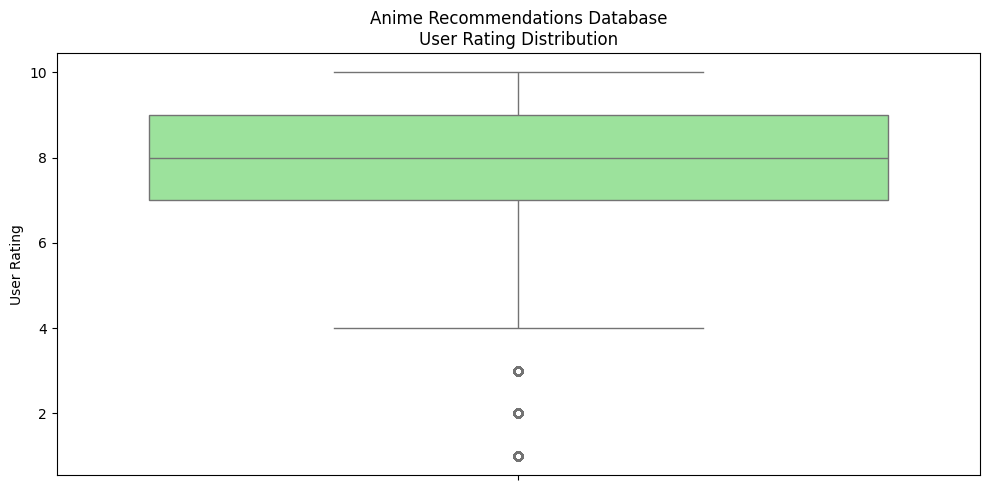

In [19]:
plt.figure(figsize=(10, 5))

sns.boxplot(data=cu_rating_df["rating"], color="lightgreen")
plt.title('Anime Recommendations Database\nUser Rating Distribution')
plt.ylabel('User Rating')

plt.tight_layout()
plt.savefig(f"{plots_location}\\anime_recommendations_database\\user_rating_distribution.png")
plt.show()

There are no more missing values.

### Anime Recommendations Database 2020

#### Anime Listing

First thing to do is to drop the scores features as it contains a lot of unknowns and they will not be used in the recommendation models.

In [20]:
hernanAnime = pd.read_csv("E:\\applied data science capstone\\data\\hernan4444\\archive\\anime-hernan.csv")
hernan_anime_df = hernanAnime.drop(columns=["Score-10", "Score-9", "Score-8", "Score-7", "Score-6", "Score-5", 
                                "Score-4", "Score-3", "Score-2", "Score-1", "Score"])

Removing the numeric columns that will not be used in the recommendation system as well as the Ranked column.

In [21]:
hernan_anime_df = hernan_anime_df.drop(columns=["Popularity", "Members", "Favorites", "Watching", "Completed", "On-Hold", 
                                                "Dropped", "Plan to Watch", "Ranked"])

Rename the MAL_ID field to anime_id to make it easier to remove duplicate animes from the combined dataset in the future.

In [22]:
hernan_anime_df = hernan_anime_df.rename(columns={"MAL_ID": "anime_id"})

Next is to remove the types that will provide no value. We will restrict the types to Tv, movie and unknown.

In [23]:
hernan_anime_df = hernan_anime_df[hernan_anime_df["Type"].isin(["TV", "Movie", "Unknown"])]
type_df = hernan_anime_df["Type"].value_counts().to_frame()
type_df = type_df.reset_index()
fig = px.treemap(type_df, path=['Type'], values='count', title="Type Distribution")
fig.show()

Unknown is a very small category with just 37. These may still be resolved once the datasets are combined.

Removing the English Name and Japanese Name columns. The name column can be used to determine the name of the anime. Also dropping the aired column.

In [24]:
hernan_anime_df = hernan_anime_df.drop(columns=["English name", "Japanese name", "Aired"])

Removing the adult content

In [25]:
hernan_anime_df = hernan_anime_df[~hernan_anime_df["Genres"].str.contains(r"(H|h)entai")]

C:\Users\Asus-Home\AppData\Local\Temp\ipykernel_21660\1558220493.py:1: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



Converting the duration to minutes

In [26]:
hernan_anime_df["Duration"] = hernan_anime_df["Duration"].apply(lambda x: x.replace(" per ep.", ""))

In [27]:
import numpy as np
def convert_duration_to_seconds(duration):
    if duration == "Unknown":
        return np.nan
    
    timeSplits = duration.split('.')
    seconds = 0
    
    for segment in timeSplits:
        segment = segment.strip()
        if 'sec' in segment:
            seconds += int(segment.split(' ')[0].strip())
        elif 'min' in segment:
            seconds += int(segment.split(' ')[0].strip()) * 60
        elif 'hr' in segment:
            seconds += int(segment.split(' ')[0].strip()) * 60 * 60
    
    return seconds

In [28]:
hernan_anime_df["duration_in_minutes"] = hernan_anime_df["Duration"].apply(lambda x: convert_duration_to_seconds(x) / 60)
hernan_anime_df = hernan_anime_df.drop(columns=["Duration"])

duration_df = hernan_anime_df["duration_in_minutes"].value_counts().to_frame()
duration_df = duration_df.reset_index()
fig = px.treemap(duration_df, path=['duration_in_minutes'], values='count', title="Duration Distribution")
fig.show()

Removing anime that are potentially music videos. Anime usually have a length of 23 minutes, anything below that is non-standard and has been removed if its genre is also music

In [29]:
hernan_anime_df = hernan_anime_df[~((hernan_anime_df["Genres"] == "Music") \
    & (hernan_anime_df["duration_in_minutes"] < 20))]

hernan_anime_df.loc[hernan_anime_df["Type"] == "Unknown", ["Type"]] = None
hernan_anime_df.loc[hernan_anime_df["Genres"] == "Unknown", ["Genres"]] = None
hernan_anime_df.loc[hernan_anime_df["Premiered"] == "Unknown", ["Premiered"]] = None
hernan_anime_df.loc[hernan_anime_df["Producers"] == "Unknown", ["Producers"]] = None
hernan_anime_df.loc[hernan_anime_df["Licensors"] == "Unknown", ["Licensors"]] = None
hernan_anime_df.loc[hernan_anime_df["Studios"] == "Unknown", ["Studios"]] = None
hernan_anime_df.loc[hernan_anime_df["Source"] == "Unknown", ["Source"]] = None
hernan_anime_df.loc[hernan_anime_df["Rating"] == "Unknown", ["Rating"]] = None

hernan_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8040 entries, 0 to 17561
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anime_id             8040 non-null   int64  
 1   Name                 8040 non-null   object 
 2   Genres               7988 non-null   object 
 3   Type                 8003 non-null   object 
 4   Episodes             8040 non-null   object 
 5   Premiered            4739 non-null   object 
 6   Producers            4958 non-null   object 
 7   Licensors            2666 non-null   object 
 8   Studios              5752 non-null   object 
 9   Source               6443 non-null   object 
 10  Rating               7585 non-null   object 
 11  duration_in_minutes  7647 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 816.6+ KB


#### Synopsis Data

In [33]:
synopsis_df = pd.read_csv("E:\\applied data science capstone\\data\\hernan4444\\archive\\anime_with_synopsis.csv")
synopsis_df = synopsisDf.drop(columns=["Score"])
synopsis_df = synopsis_df.rename(columns={"MAL_ID": "anime_id", "sypnopsis": "synopsis"})

Fill the unknown synopsis with na so as to enable filling of missing values in the future

In [34]:
synopsis_df.loc[synopsis_df["synopsis"].str.contains("No synopsis", na=False), "synopsis"] = np.nan
synopsis_df.describe(include=object)

,Name,Genres,synopsis
count,16214,16214,15461
unique,16210,4857,15218
top,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Music,Furukawa Taku film.
freq,3,790,13


In [35]:
synopsis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  16214 non-null  int64 
 1   Name      16214 non-null  object
 2   Genres    16214 non-null  object
 3   synopsis  15461 non-null  object
dtypes: int64(1), object(3)
memory usage: 506.8+ KB


### MyAnimeList Comment Dataset V2

#### Anime Listing

Remove the id and jpName columns as well as consolidate the anime title column

In [37]:
natleeAnime = pd.read_csv("E:\\applied data science capstone\\data\\natlee\\archive\\anime_list.csv")
natlee_anime_df = natleeAnime.drop(columns=["id", "jpName", "score", "scoredByUser", "aired"])

natlee_anime_df["title"] = natlee_anime_df["engName"]
natlee_anime_df["title"] = natlee_anime_df["title"].fillna(natlee_anime_df["synonymsName"])
natlee_anime_df = natlee_anime_df.dropna(subset=["title"])
natlee_anime_df = natlee_anime_df.drop(columns=["engName", "synonymsName"])

Convert the episodes column to a numeric feature

In [38]:
natlee_anime_df["episodes"] = pd.to_numeric(natlee_anime_df["episodes"], errors='coerce')

Standardize the missing values

In [39]:
natlee_anime_df.loc[natlee_anime_df["producer"] == "add some", "producer"] = None
natlee_anime_df.loc[natlee_anime_df["licensors"] == "add some", "licensors"] = None
natlee_anime_df.loc[natlee_anime_df["studios"] == "add some", "studios"] = None
natlee_anime_df.loc[natlee_anime_df["source"] == "Unknown", "source"] = None

Remove all types except for movie and tv

In [40]:
natlee_anime_df = natlee_anime_df[natlee_anime_df["workType"].isin(["TV", "Movie"])]

Remove adult content

In [41]:
natlee_anime_df["genres"] = natlee_anime_df["genres"].astype(str)
natlee_anime_df = natlee_anime_df[~natlee_anime_df["genres"].str.contains(r"(H|h)entai")]

C:\Users\Asus-Home\AppData\Local\Temp\ipykernel_21660\2037110495.py:2: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



Convert duration to minutes

In [42]:
natlee_anime_df["duration_in_minutes"] = natlee_anime_df["duration"] \
    .apply(lambda x: convert_duration_to_seconds(x) / 60)

Remove unused columns

In [43]:
natlee_anime_df = natlee_anime_df.drop(columns=["popularityRank", "allRank", "members", "favorites", "lastUpdate", "duration"])
natlee_anime_df = natlee_anime_df.rename(columns={"workId": "anime_id", "workType": "type"})

natlee_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8649 entries, 0 to 24588
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anime_id             8649 non-null   int64  
 1   url                  8649 non-null   object 
 2   type                 8649 non-null   object 
 3   episodes             8452 non-null   float64
 4   status               8649 non-null   object 
 5   premiered            4588 non-null   object 
 6   producer             4987 non-null   object 
 7   broadcast            5297 non-null   object 
 8   licensors            2857 non-null   object 
 9   studios              6032 non-null   object 
 10  genres               8649 non-null   object 
 11  themes               4986 non-null   object 
 12  demographic          3774 non-null   object 
 13  source               7277 non-null   object 
 14  rating               8392 non-null   object 
 15  title                8649 non-null   objec